<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/6_BatchNormalization_Regularization/MNIST_Normalization_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/regularization'
%cd $BASE_DIR
from utils import train, test, model,plot_metrics,helper,data_loader 
import torch

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

/content/drive/MyDrive/regularization


In [16]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

cuda = torch.cuda.is_available()
if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")


In [17]:
train_transforms, test_transforms = data_loader.data_augmentation()
train,test = data_loader.download_mnist_data(train_transforms, test_transforms)

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader, test_loader = data_loader.dataloader(train, test,dataloader_args)

In [18]:
exp = { 
    #"Experiment Name" : [norm_type,l1_factor,l2_factor] 
    
    "LayerNorm":['LN',0,0],
    "GroupNorm":['GN',0,0],
    'BatchNorm+L1':['BN',0.001,0],
    'GroupNorm+L1':['GN',0.001,0],
    'LayerNorm+L2':['LN',0,0.001],
    'BatchNorm+L1+L2':['BN',0.001,0.001]
}

exp_metrics = {}
for e in exp.items():
  print('\n' +'\033[1m' + '=====================================Model Training for '+ f'{e[0]} ======================================================'+'\033[0m\n')
  (exp_metrics[e[0]]),model = helper.experiments(train_loader, test_loader,e[1][0],e[1][1],e[1][2],0.03,20)
  torch.save(model, './models/{}.pt'.format(e[0]))

  0%|          | 0/469 [00:00<?, ?it/s]


=====================================Model Training for LayerNorm ======================================================

Epoch 1:


Loss=0.30438393354415894 Batch_id=468 Accuracy=63.02: 100%|██████████| 469/469 [00:30<00:00, 15.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2342, Accuracy: 9617/10000 (96.17%)

Epoch 2:


Loss=0.1347164511680603 Batch_id=468 Accuracy=93.65: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0848, Accuracy: 9762/10000 (97.62%)

Epoch 3:


Loss=0.06209005415439606 Batch_id=468 Accuracy=95.59: 100%|██████████| 469/469 [00:30<00:00, 15.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9871/10000 (98.71%)

Epoch 4:


Loss=0.10599452257156372 Batch_id=468 Accuracy=96.59: 100%|██████████| 469/469 [00:30<00:00, 15.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0432, Accuracy: 9868/10000 (98.68%)

Epoch 5:


Loss=0.13559827208518982 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0370, Accuracy: 9894/10000 (98.94%)

Epoch 6:


Loss=0.05318548157811165 Batch_id=468 Accuracy=97.45: 100%|██████████| 469/469 [00:31<00:00, 14.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9908/10000 (99.08%)

Epoch 7:


Loss=0.08095268160104752 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9906/10000 (99.06%)

Epoch 8:


Loss=0.07455270737409592 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:31<00:00, 15.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9915/10000 (99.15%)

Epoch 9:


Loss=0.22069376707077026 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0787, Accuracy: 9762/10000 (97.62%)

Epoch 10:


Loss=0.21101778745651245 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9896/10000 (98.96%)

Epoch 11:


Loss=0.06166617572307587 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9927/10000 (99.27%)

Epoch 12:


Loss=0.053044289350509644 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:31<00:00, 14.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9922/10000 (99.22%)

Epoch 13:


Loss=0.03969145566225052 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9914/10000 (99.14%)

Epoch 14:


Loss=0.0440913550555706 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9936/10000 (99.36%)

Epoch 15:


Loss=0.022525742650032043 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:31<00:00, 15.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.33%)

Epoch 16:


Loss=0.019235340878367424 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9938/10000 (99.38%)

Epoch 17:


Loss=0.1333935409784317 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9937/10000 (99.37%)

Epoch 18:


Loss=0.017643872648477554 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9940/10000 (99.40%)

Epoch 19:


Loss=0.007908782921731472 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9938/10000 (99.38%)

Epoch 20:


Loss=0.0276928897947073 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)


=====================================Model Training for GroupNorm ======================================================

Epoch 1:


Loss=0.6084983944892883 Batch_id=468 Accuracy=58.89: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3799, Accuracy: 9294/10000 (92.94%)

Epoch 2:


Loss=0.4049129784107208 Batch_id=468 Accuracy=91.41: 100%|██████████| 469/469 [00:31<00:00, 14.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0911, Accuracy: 9768/10000 (97.68%)

Epoch 3:


Loss=0.04573093727231026 Batch_id=468 Accuracy=94.94: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0626, Accuracy: 9823/10000 (98.23%)

Epoch 4:


Loss=0.19344878196716309 Batch_id=468 Accuracy=95.97: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0519, Accuracy: 9856/10000 (98.56%)

Epoch 5:


Loss=0.08943407982587814 Batch_id=468 Accuracy=96.58: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9882/10000 (98.82%)

Epoch 6:


Loss=0.06771489977836609 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9897/10000 (98.97%)

Epoch 7:


Loss=0.07258227467536926 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:31<00:00, 15.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9912/10000 (99.12%)

Epoch 8:


Loss=0.21595489978790283 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9908/10000 (99.08%)

Epoch 9:


Loss=0.1683334857225418 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:30<00:00, 15.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9927/10000 (99.27%)

Epoch 10:


Loss=0.06313049048185349 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9918/10000 (99.18%)

Epoch 11:


Loss=0.0866495743393898 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9919/10000 (99.19%)

Epoch 12:


Loss=0.03873071447014809 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:30<00:00, 15.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9922/10000 (99.22%)

Epoch 13:


Loss=0.029166094958782196 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:30<00:00, 15.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 9926/10000 (99.26%)

Epoch 14:


Loss=0.09547463804483414 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9921/10000 (99.21%)

Epoch 15:


Loss=0.05022964999079704 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:30<00:00, 15.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9937/10000 (99.37%)

Epoch 16:


Loss=0.06095890328288078 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:30<00:00, 15.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9941/10000 (99.41%)

Epoch 17:


Loss=0.12184643000364304 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9944/10000 (99.44%)

Epoch 18:


Loss=0.04052368924021721 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9947/10000 (99.47%)

Epoch 19:


Loss=0.005479376297444105 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9946/10000 (99.46%)

Epoch 20:


Loss=0.021586008369922638 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:30<00:00, 15.26it/s]



Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)



  0%|          | 0/469 [00:00<?, ?it/s]


=====================================Model Training for BatchNorm+L1 ======================================================

Epoch 1:


Loss=0.8938573598861694 Batch_id=468 Accuracy=67.11: 100%|██████████| 469/469 [00:31<00:00, 15.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2307, Accuracy: 9528/10000 (95.28%)

Epoch 2:


Loss=0.5785737633705139 Batch_id=468 Accuracy=92.77: 100%|██████████| 469/469 [00:30<00:00, 15.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1153, Accuracy: 9665/10000 (96.65%)

Epoch 3:


Loss=0.5028098225593567 Batch_id=468 Accuracy=95.11: 100%|██████████| 469/469 [00:31<00:00, 14.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0824, Accuracy: 9748/10000 (97.48%)

Epoch 4:


Loss=0.5780401229858398 Batch_id=468 Accuracy=95.72: 100%|██████████| 469/469 [00:31<00:00, 14.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9848/10000 (98.48%)

Epoch 5:


Loss=0.47233355045318604 Batch_id=468 Accuracy=95.94: 100%|██████████| 469/469 [00:31<00:00, 14.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0722, Accuracy: 9787/10000 (97.87%)

Epoch 6:


Loss=0.448508083820343 Batch_id=468 Accuracy=96.20: 100%|██████████| 469/469 [00:30<00:00, 15.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 9822/10000 (98.22%)

Epoch 7:


Loss=0.35516032576560974 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:31<00:00, 15.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0595, Accuracy: 9803/10000 (98.03%)

Epoch 8:


Loss=0.356985867023468 Batch_id=468 Accuracy=96.37: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0417, Accuracy: 9876/10000 (98.76%)

Epoch 9:


Loss=0.39673522114753723 Batch_id=468 Accuracy=96.45: 100%|██████████| 469/469 [00:31<00:00, 14.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0530, Accuracy: 9845/10000 (98.45%)

Epoch 10:


Loss=0.42300671339035034 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:31<00:00, 14.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0354, Accuracy: 9887/10000 (98.87%)

Epoch 11:


Loss=0.37699094414711 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:31<00:00, 14.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0554, Accuracy: 9847/10000 (98.47%)

Epoch 12:


Loss=0.33377015590667725 Batch_id=468 Accuracy=96.71: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0377, Accuracy: 9887/10000 (98.87%)

Epoch 13:


Loss=0.40108388662338257 Batch_id=468 Accuracy=96.79: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0949, Accuracy: 9712/10000 (97.12%)

Epoch 14:


Loss=0.3291950225830078 Batch_id=468 Accuracy=96.91: 100%|██████████| 469/469 [00:31<00:00, 14.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9885/10000 (98.85%)

Epoch 15:


Loss=0.3538376986980438 Batch_id=468 Accuracy=97.02: 100%|██████████| 469/469 [00:31<00:00, 15.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0374, Accuracy: 9887/10000 (98.87%)

Epoch 16:


Loss=0.2589429020881653 Batch_id=468 Accuracy=97.19: 100%|██████████| 469/469 [00:31<00:00, 14.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9893/10000 (98.93%)

Epoch 17:


Loss=0.29468780755996704 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9915/10000 (99.15%)

Epoch 18:


Loss=0.31314000487327576 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9925/10000 (99.25%)

Epoch 19:


Loss=0.28968870639801025 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

Epoch 20:


Loss=0.25555866956710815 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:31<00:00, 15.04it/s]



Test set: Average loss: 0.0183, Accuracy: 9944/10000 (99.44%)



  0%|          | 0/469 [00:00<?, ?it/s]


=====================================Model Training for GroupNorm+L1 ======================================================

Epoch 1:


Loss=1.0978268384933472 Batch_id=468 Accuracy=59.32: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3588, Accuracy: 9478/10000 (94.78%)

Epoch 2:


Loss=0.9636750221252441 Batch_id=468 Accuracy=91.22: 100%|██████████| 469/469 [00:31<00:00, 15.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1102, Accuracy: 9766/10000 (97.66%)

Epoch 3:


Loss=0.5857817530632019 Batch_id=468 Accuracy=94.48: 100%|██████████| 469/469 [00:31<00:00, 14.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0940, Accuracy: 9753/10000 (97.53%)

Epoch 4:


Loss=0.4983350932598114 Batch_id=468 Accuracy=95.15: 100%|██████████| 469/469 [00:31<00:00, 14.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0710, Accuracy: 9817/10000 (98.17%)

Epoch 5:


Loss=0.46415045857429504 Batch_id=468 Accuracy=95.37: 100%|██████████| 469/469 [00:31<00:00, 15.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0833, Accuracy: 9773/10000 (97.73%)

Epoch 6:


Loss=0.6023327112197876 Batch_id=468 Accuracy=95.78: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0736, Accuracy: 9798/10000 (97.98%)

Epoch 7:


Loss=0.6403661966323853 Batch_id=468 Accuracy=95.75: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0704, Accuracy: 9803/10000 (98.03%)

Epoch 8:


Loss=0.5387458205223083 Batch_id=468 Accuracy=95.71: 100%|██████████| 469/469 [00:31<00:00, 14.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0730, Accuracy: 9794/10000 (97.94%)

Epoch 9:


Loss=0.4942227005958557 Batch_id=468 Accuracy=96.12: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0534, Accuracy: 9856/10000 (98.56%)

Epoch 10:


Loss=0.48683714866638184 Batch_id=468 Accuracy=96.08: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0664, Accuracy: 9814/10000 (98.14%)

Epoch 11:


Loss=0.3984898030757904 Batch_id=468 Accuracy=96.22: 100%|██████████| 469/469 [00:31<00:00, 14.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0585, Accuracy: 9835/10000 (98.35%)

Epoch 12:


Loss=0.35797661542892456 Batch_id=468 Accuracy=96.34: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0591, Accuracy: 9835/10000 (98.35%)

Epoch 13:


Loss=0.40641704201698303 Batch_id=468 Accuracy=96.52: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0562, Accuracy: 9831/10000 (98.31%)

Epoch 14:


Loss=0.4487968683242798 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:31<00:00, 14.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 9855/10000 (98.55%)

Epoch 15:


Loss=0.2894066870212555 Batch_id=468 Accuracy=96.71: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9858/10000 (98.58%)

Epoch 16:


Loss=0.27260541915893555 Batch_id=468 Accuracy=97.07: 100%|██████████| 469/469 [00:31<00:00, 14.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0447, Accuracy: 9882/10000 (98.82%)

Epoch 17:


Loss=0.3820350766181946 Batch_id=468 Accuracy=97.20: 100%|██████████| 469/469 [00:31<00:00, 14.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9869/10000 (98.69%)

Epoch 18:


Loss=0.3501386344432831 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:31<00:00, 14.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9914/10000 (99.14%)

Epoch 19:


Loss=0.24818438291549683 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:32<00:00, 14.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9918/10000 (99.18%)

Epoch 20:


Loss=0.2768090069293976 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:32<00:00, 14.35it/s]



Test set: Average loss: 0.0280, Accuracy: 9927/10000 (99.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


=====================================Model Training for LayerNorm+L2 ======================================================

Epoch 1:


Loss=0.3680899441242218 Batch_id=468 Accuracy=67.31: 100%|██████████| 469/469 [00:30<00:00, 15.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2579, Accuracy: 9556/10000 (95.56%)

Epoch 2:


Loss=0.420865535736084 Batch_id=468 Accuracy=93.22: 100%|██████████| 469/469 [00:30<00:00, 15.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0875, Accuracy: 9772/10000 (97.72%)

Epoch 3:


Loss=0.13430964946746826 Batch_id=468 Accuracy=95.68: 100%|██████████| 469/469 [00:30<00:00, 15.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0541, Accuracy: 9833/10000 (98.33%)

Epoch 4:


Loss=0.024975702166557312 Batch_id=468 Accuracy=96.70: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9903/10000 (99.03%)

Epoch 5:


Loss=0.20966482162475586 Batch_id=468 Accuracy=97.33: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 9890/10000 (98.90%)

Epoch 6:


Loss=0.0777418240904808 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0438, Accuracy: 9874/10000 (98.74%)

Epoch 7:


Loss=0.1577429622411728 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0318, Accuracy: 9906/10000 (99.06%)

Epoch 8:


Loss=0.0870731994509697 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9914/10000 (99.14%)

Epoch 9:


Loss=0.07596492022275925 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:30<00:00, 15.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9904/10000 (99.04%)

Epoch 10:


Loss=0.031116781756281853 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9931/10000 (99.31%)

Epoch 11:


Loss=0.05475928261876106 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:31<00:00, 15.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9919/10000 (99.19%)

Epoch 12:


Loss=0.12886688113212585 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9919/10000 (99.19%)

Epoch 13:


Loss=0.18333353102207184 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9936/10000 (99.36%)

Epoch 14:


Loss=0.016911761835217476 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9922/10000 (99.22%)

Epoch 15:


Loss=0.10085844248533249 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

Epoch 16:


Loss=0.025263480842113495 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9930/10000 (99.30%)

Epoch 17:


Loss=0.06615624576807022 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

Epoch 18:


Loss=0.03979829326272011 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:30<00:00, 15.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9937/10000 (99.37%)

Epoch 19:


Loss=0.004150056745857 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:31<00:00, 14.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9938/10000 (99.38%)

Epoch 20:


Loss=0.00938530545681715 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9937/10000 (99.37%)


=====================================Model Training for BatchNorm+L1+L2 ======================================================

Epoch 1:


Loss=0.8967410922050476 Batch_id=468 Accuracy=67.08: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2581, Accuracy: 9471/10000 (94.71%)

Epoch 2:


Loss=0.5784932374954224 Batch_id=468 Accuracy=93.89: 100%|██████████| 469/469 [00:31<00:00, 14.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0622, Accuracy: 9847/10000 (98.47%)

Epoch 3:


Loss=0.4858332872390747 Batch_id=468 Accuracy=95.51: 100%|██████████| 469/469 [00:31<00:00, 14.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0615, Accuracy: 9821/10000 (98.21%)

Epoch 4:


Loss=0.39899975061416626 Batch_id=468 Accuracy=95.73: 100%|██████████| 469/469 [00:31<00:00, 14.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0878, Accuracy: 9730/10000 (97.30%)

Epoch 5:


Loss=0.44587719440460205 Batch_id=468 Accuracy=96.00: 100%|██████████| 469/469 [00:31<00:00, 14.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0508, Accuracy: 9848/10000 (98.48%)

Epoch 6:


Loss=0.49581271409988403 Batch_id=468 Accuracy=96.06: 100%|██████████| 469/469 [00:31<00:00, 14.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0566, Accuracy: 9811/10000 (98.11%)

Epoch 7:


Loss=0.33732691407203674 Batch_id=468 Accuracy=96.37: 100%|██████████| 469/469 [00:31<00:00, 14.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0592, Accuracy: 9828/10000 (98.28%)

Epoch 8:


Loss=0.4644993543624878 Batch_id=468 Accuracy=96.23: 100%|██████████| 469/469 [00:31<00:00, 14.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0701, Accuracy: 9790/10000 (97.90%)

Epoch 9:


Loss=0.3810897767543793 Batch_id=468 Accuracy=96.33: 100%|██████████| 469/469 [00:31<00:00, 14.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9846/10000 (98.46%)

Epoch 10:


Loss=0.31836211681365967 Batch_id=468 Accuracy=96.54: 100%|██████████| 469/469 [00:31<00:00, 14.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0637, Accuracy: 9803/10000 (98.03%)

Epoch 11:


Loss=0.3832193613052368 Batch_id=468 Accuracy=96.51: 100%|██████████| 469/469 [00:31<00:00, 14.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0400, Accuracy: 9879/10000 (98.79%)

Epoch 12:


Loss=0.45404863357543945 Batch_id=468 Accuracy=96.66: 100%|██████████| 469/469 [00:31<00:00, 14.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0513, Accuracy: 9842/10000 (98.42%)

Epoch 13:


Loss=0.31805419921875 Batch_id=468 Accuracy=96.80: 100%|██████████| 469/469 [00:31<00:00, 14.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0440, Accuracy: 9859/10000 (98.59%)

Epoch 14:


Loss=0.29529932141304016 Batch_id=468 Accuracy=96.74: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0481, Accuracy: 9847/10000 (98.47%)

Epoch 15:


Loss=0.2834588289260864 Batch_id=468 Accuracy=96.93: 100%|██████████| 469/469 [00:32<00:00, 14.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9917/10000 (99.17%)

Epoch 16:


Loss=0.3398851156234741 Batch_id=468 Accuracy=97.07: 100%|██████████| 469/469 [00:31<00:00, 14.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0489, Accuracy: 9860/10000 (98.60%)

Epoch 17:


Loss=0.3614215850830078 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:31<00:00, 14.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9924/10000 (99.24%)

Epoch 18:


Loss=0.29481831192970276 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:32<00:00, 14.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9921/10000 (99.21%)

Epoch 19:


Loss=0.2804638743400574 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:32<00:00, 14.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.33%)

Epoch 20:


Loss=0.3077769875526428 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:32<00:00, 14.57it/s]



Test set: Average loss: 0.0183, Accuracy: 9943/10000 (99.43%)



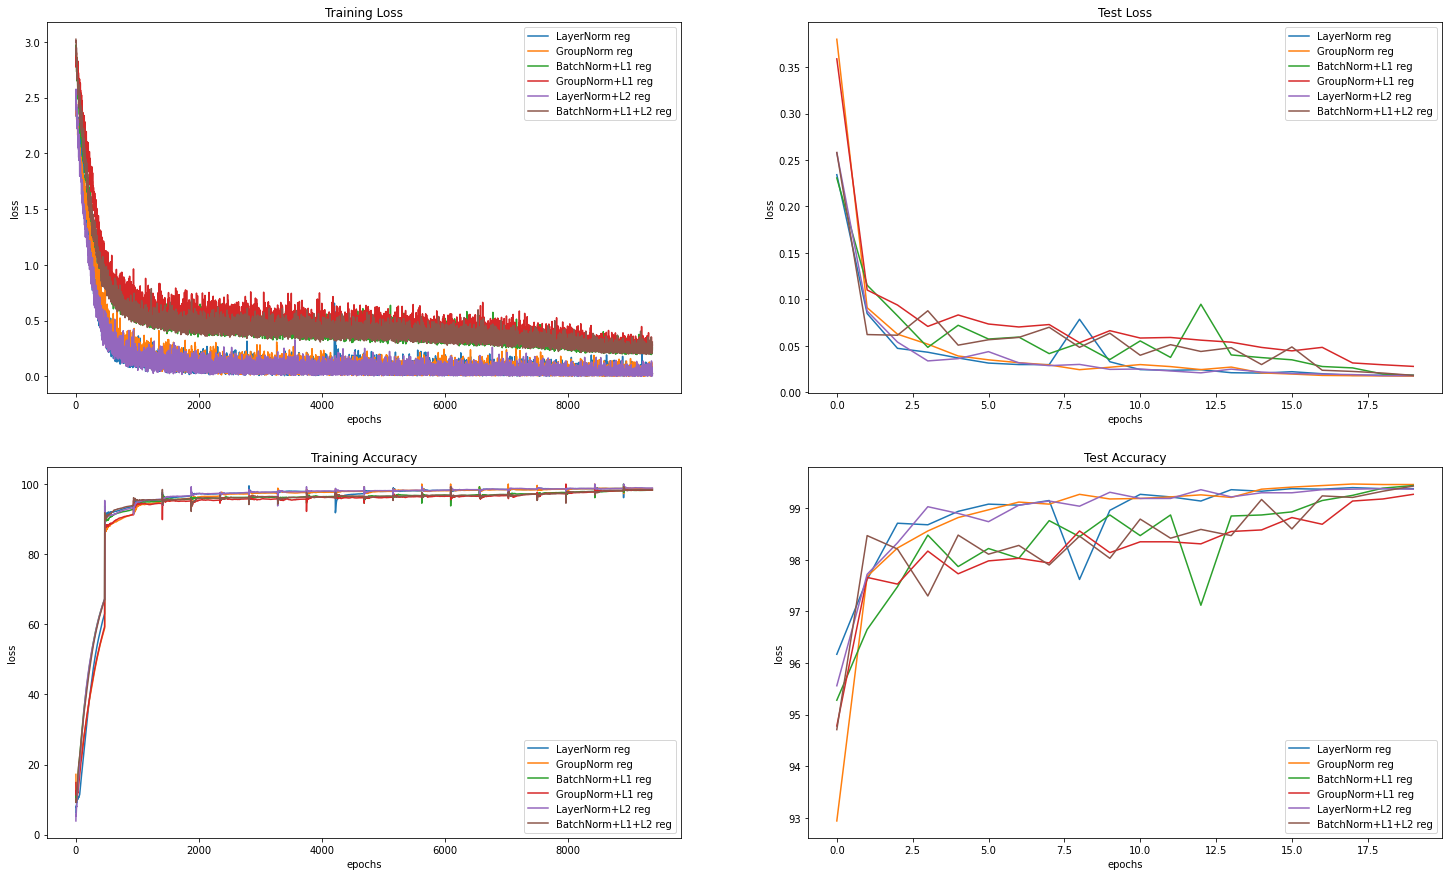

In [19]:
plot_metrics.plot_metrics(exp_metrics)

In [25]:
# for e in exp.items():
#   print('\n' +'\033[1m' + '=====================================Miss Classification for '+ f'{e[0]} ======================================================'+'\033[0m\n')
#   model = torch.load(f'./models/{e[0]}.pt')
#   model.eval()
#   helper.wrong_predictions(test_loader,model,device)

Total wrong predictions are 54


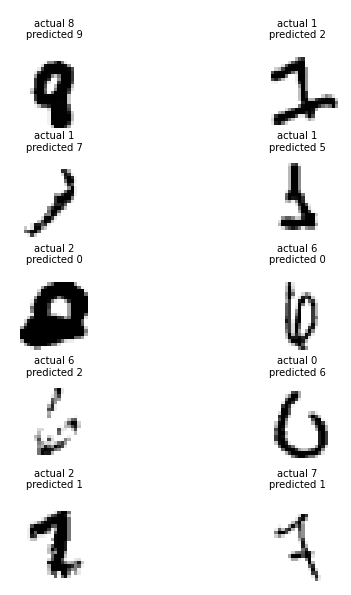

In [26]:
model = torch.load('./models/GroupNorm.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

Total wrong predictions are 56


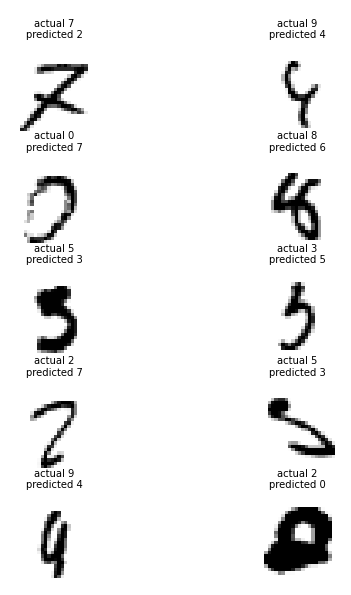

In [27]:
model = torch.load('./models/BatchNorm+L1.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)